In [1]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=3

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=3


In [2]:
%load_ext autoreload
%autoreload 2

In [11]:
from cuml.manifold.umap import UMAP as cumlUMAP

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed
import umap
import pandas as pd

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir

In [5]:
DATASET_ID = 'gibbon_morita_segmented'

In [6]:
window_length_ms = 100
hop_length_ms = 20

In [7]:
ensure_dir(DATA_DIR/'umap_windows' / DATASET_ID)
save_loc = DATA_DIR/'umap_windows' / DATASET_ID / ('gibbon_windows_' + str(window_length_ms)+ '.pickle')

In [8]:
windows_df = pd.read_pickle(save_loc)

In [9]:
windows_df[:3]

,key,bout_number,bout_start_time,bout_end_time,bout_window,bout_spec
0,20170912-070002_01_ch,0,0,1,"[[-0.0055754497, 0.04379821, 0.010071515, 0.01...","[[-0.0055754497, -0.01713745, -0.021780146, -0..."
1,20170912-070002_01_ch,1,1,2,"[[-0.00048214695, 0.0070607667, 0.00067745586,...","[[-0.00048214695, -0.008496964, -0.0117263505,..."
2,20170912-070002_01_ch,2,2,22,"[[-0.007376921, 0.04710796, 0.017117992, -0.00...","[[-0.007376921, -0.023884187, -0.022982646, -0..."


In [16]:
len(windows_df)

538

In [10]:
all_windows = np.vstack(windows_df.bout_window)
np.shape(all_windows)

(3070846, 160)

In [12]:
cuml_umap = cumlUMAP(min_dist = 0.5)
embedding = cuml_umap.fit_transform(all_windows)

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Parameter should_downcast is deprecated, use convert_dtype in fit, fit_transform and transform  methods instead. 
  """Entry point for launching an IPython kernel.
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Parameter should_downcast is deprecated, use convert_dtype in fit, fit_transform and transform  methods instead. 
  


(-100, 100)

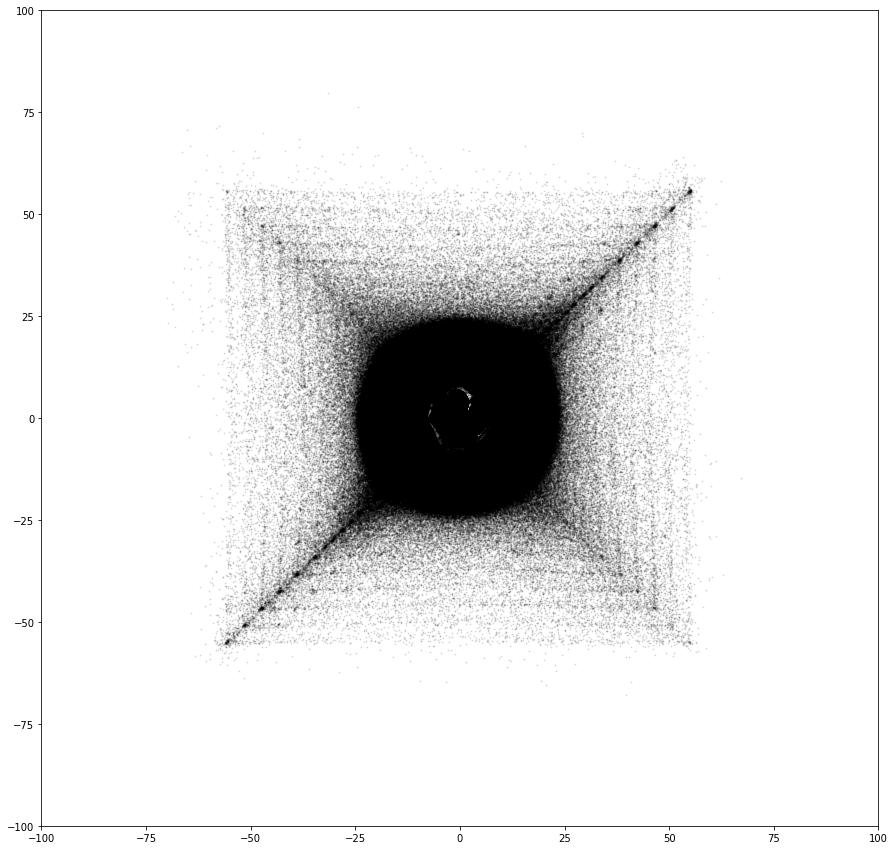

In [18]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(embedding[:,0], embedding[:,1], color = 'k', s=1, alpha = 0.1)
ax.set_ylim([-60,60])
ax.set_xlim([-60,60])

(-60, 60)

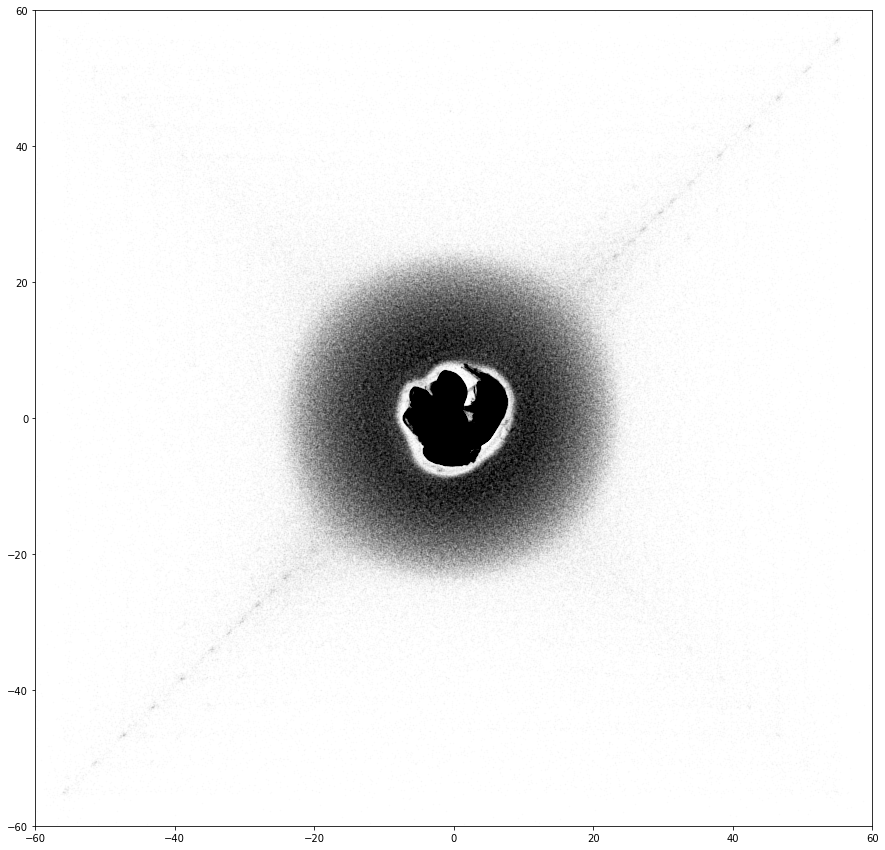

In [19]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(embedding[:,0], embedding[:,1], color = 'k', s=1, alpha = 0.01)
ax.set_ylim([-60,60])
ax.set_xlim([-60,60])

(-20, 20)

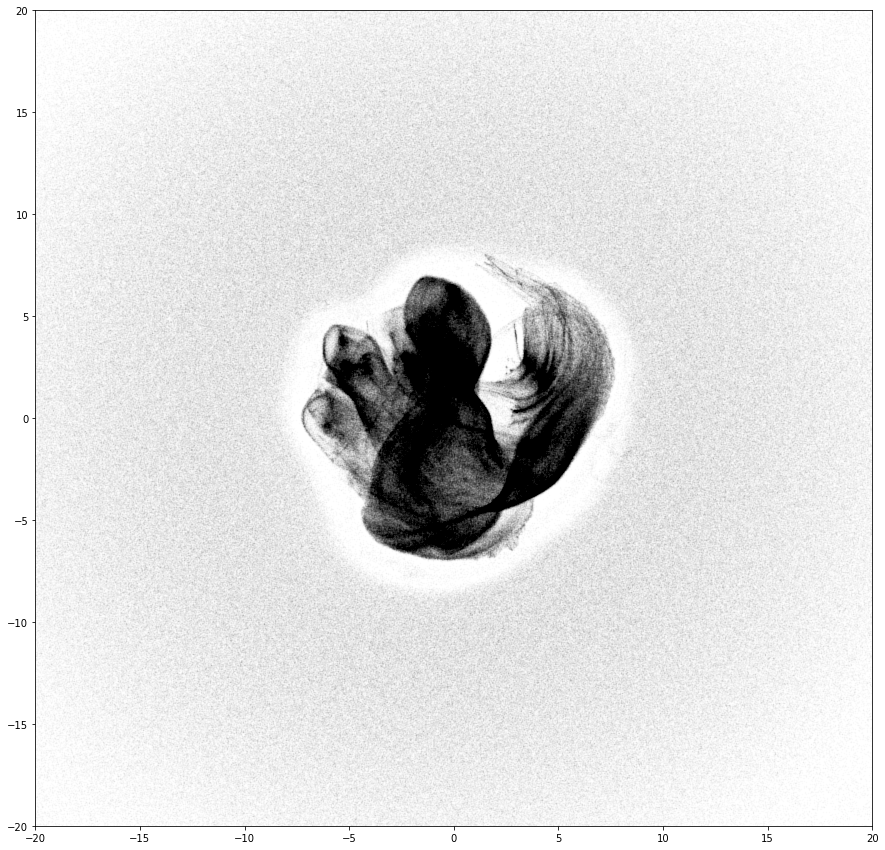

In [21]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(embedding[:,0], embedding[:,1], color = 'k', s=1, alpha = 0.01)
ax.set_ylim([-20,20])
ax.set_xlim([-20,20])